# [Codes] Comparing Five Machine Learning-Based Regression Models for Predicting the Study Period of Mathematics Students at IPB University
[Sri Nurdiati](https://scholar.google.com/citations?user=o2h0HGUAAAAJ&hl=en)
dan
[Mohamad Khoirun Najib](https://scholar.google.com/citations?hl=en&user=2K5lI0kAAAAJ)

---

A model that can predict a student's study period based on GPA is needed for characterization so that supervisors can apply the right strategy for their students. One model that can be used is a machine learning-based regression model. Therefore, this study aims to implement and select a machine learning-based regression model to predict a student's study period based on GPA. Several regression models used are 
- least-square regression, 
- ridge regression, 
- Huber regression, 
- quantile regression, and 
- quantile regression with $l_2$-regularization 

provided by Machine Learning in Julia (MLJ). 

The model is evaluated and selected based on several criteria such as maximum error, RMSE, and MAPE. 

## Collecting and Pre-processing Data
The data used in this study is GPA data from semesters 1 to 6 and the study period of students of the S-1 Mathematics study program, IPB University, who entered in 2013-2016.

In [1]:
using CSV, DataFrames, MLJ, PrettyPrinting, Plots, StableRNGs
import MLJScientificTypes

In [2]:
C = CSV.read("data.csv",DataFrame)
first(C, 3) |> pretty

┌────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────┐
│ X1         │ X2         │ X3         │ X4         │ X5         │ X6         │ Y     │
│ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Int64 │
│ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Count │
├────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼───────┤
│ 4.0        │ 3.49       │ 3.48       │ 3.52       │ 3.55       │ 3.47       │ 48.0  │
│ 4.0        │ 3.92       │ 3.92       │ 3.92       │ 3.89       │ 3.83       │ 47.0  │
│ 3.79       │ 3.62       │ 3.39       │ 3.34       │ 3.34       │ 3.3        │ 51.0  │
└────────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────┘


In [3]:
C = coerce(C, :Y=>Continuous)
first(C, 3) |> pretty

┌────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ X1         │ X2         │ X3         │ X4         │ X5         │ X6         │ Y          │
│ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │
│ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │
├────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ 4.0        │ 3.49       │ 3.48       │ 3.52       │ 3.55       │ 3.47       │ 48.0       │
│ 4.0        │ 3.92       │ 3.92       │ 3.92       │ 3.89       │ 3.83       │ 47.0       │
│ 3.79       │ 3.62       │ 3.39       │ 3.34       │ 3.34       │ 3.3        │ 51.0       │
└────────────┴────────────┴────────────┴────────────┴────────────┴────────────┴────────────┘


In [4]:
y, X = unpack(C, ==(:Y), colname -> true) 
first(X, 3) |> pretty

┌────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ X1         │ X2         │ X3         │ X4         │ X5         │ X6         │
│ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │
│ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │
├────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ 4.0        │ 3.49       │ 3.48       │ 3.52       │ 3.55       │ 3.47       │
│ 4.0        │ 3.92       │ 3.92       │ 3.92       │ 3.89       │ 3.83       │
│ 3.79       │ 3.62       │ 3.39       │ 3.34       │ 3.34       │ 3.3        │
└────────────┴────────────┴────────────┴────────────┴────────────┴────────────┘


In [5]:
for m in models(matching(X, y)) 
    println(rpad(m.name, 40), "($(m.package_name))") 
end

ARDRegressor                            (ScikitLearn)
AdaBoostRegressor                       (ScikitLearn)
BaggingRegressor                        (ScikitLearn)
BayesianRidgeRegressor                  (ScikitLearn)
ConstantRegressor                       (MLJModels)
DecisionTreeRegressor                   (BetaML)
DecisionTreeRegressor                   (DecisionTree)
DeterministicConstantRegressor          (MLJModels)
DummyRegressor                          (ScikitLearn)
ElasticNetCVRegressor                   (ScikitLearn)
ElasticNetRegressor                     (MLJLinearModels)
ElasticNetRegressor                     (ScikitLearn)
EpsilonSVR                              (LIBSVM)
EvoTreeGaussian                         (EvoTrees)
EvoTreeRegressor                        (EvoTrees)
ExtraTreesRegressor                     (ScikitLearn)
GaussianProcessRegressor                (ScikitLearn)
GradientBoostingRegressor               (ScikitLearn)
HuberRegressor                          (ML

## Dividing data
The data is divided into 
- training data for students who entered in 2013-2015 and 
- testing data for students who entered in 2016. 

The total data obtained was 203 data, with 178 data (87.68%) as training data and the rest as testing data.

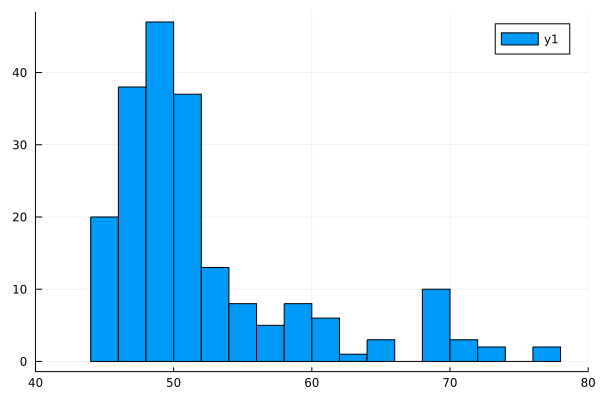

In [186]:
histogram(y,xlim=(40,80))

In [73]:
?StableRNG

search: StableRNG StableRNGs distinguishable_colors



```
LehmerRNG
StableRNG
```

Simple RNG with stable streams, usually suitable for testing. Use only the alias `StableRNG`, as the name `LehmerRNG` is not part of the API.

Construction: `StableRNG(seed::Integer)`.

Seeding: `Random.seed!(rng::StableRNG, seed::Integer)`.


In [132]:
StableRNG(1)

StableRNGs.LehmerRNG(state=0x00000000000000000000000000000003)

In [135]:
train,test = partition(1:length(y),0.75,shuffle=true,rng=StableRNG(1))

([69, 182, 196, 11, 30, 155, 186, 28, 119, 199  …  66, 176, 131, 148, 27, 35, 87, 71, 149, 108], [93, 7, 34, 1, 165, 147, 95, 106, 103, 99  …  184, 49, 18, 115, 25, 161, 142, 117, 179, 84])

In [136]:
using StatsPlots

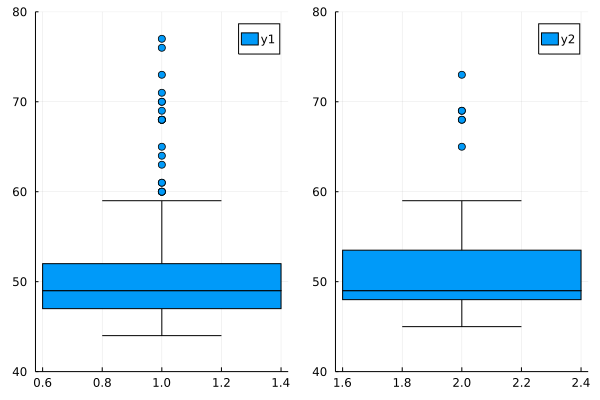

In [137]:
StatsPlots.plot(layout=(1,2))
boxplot!(y[train],subplot=1,ylim=(40,80))
boxplot!(y[test],subplot=2,ylim=(40,80))

In [138]:
@show length(train)
@show length(train)/length(y)
@show length(test)
@show length(test)/length(y);

length(train) = 152
length(train) / length(y) = 0.7487684729064039
length(test) = 51
length(test) / length(y) = 0.2512315270935961


## Multiple Linear Regression Model
This study uses six predictors, i.e., GPA semesters 1 to 6, with one response variable, i.e., student study period, so the regression model that will be used is

\begin{equation}
y=f_\beta (x)+\varepsilon=\beta_0+\sum_{k=1}^6 \beta_k x_k + \varepsilon
\end{equation}

where $y$ is the study period, $x_k$ is the student's GPA in the k-th semester, $\beta_k$ is the coefficient of $x_k$, $\beta_0$ is the intercept coefficient, and $f_\beta (x)$ is the predicted value of $y$.


### 1 Least-Square Regression Model
Least-square regression is the most popular and commonly used. The "best" coefficient value in the least-square regression model is obtained by minimizing the average value of the squared loss or mean squared error (MSE) (Heath, 2002; Johnson & Faunt, 1992), given by

\begin{equation}
{\hat{\beta}}_{ls}=\arg{\min\limits_{\beta}{\frac{1}{N}\sum_{i=1}^{N}\left(f_\beta\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2}}
\end{equation}

where $N$ is the number of training data, ${\hat{\beta}}_{ls}$ is the approximate value of the coefficient $\beta$ based on least-square regression, $y^{\left(i\right)}$ and $f_\beta\left(x^{\left(i\right)}\right)$ are the actual and predicted values of the $i$-th student study period.

The coefficients of the least-squares regression model can be found easily using a matrix formulation. Suppose there is a matrix $X$ containing a set of predictors and $\beta$ is a vector containing the coefficients of each corresponding predictor, i.e.,

$$X=\left[1\ \ X_1\ \ X_2\ \ X_3\ \ X_4\ \ X_5\ \ X_6\right],\ \ \beta=\left[\beta_0\ \ \beta_1\ \ \beta_2\ \ \beta_3\ \ \beta_4\ \ \beta_5\ \ \beta_6\right]^T $$

where $X_k$ is a column vector containing student GPA in the $k$-th semester on the training data. If $Y$ is a column vector containing the response variable, i.e., the study period on the training data, then the coefficient value of $\beta_{ls}$ (estimator for $\beta$) is given by

$${\hat{\beta}}_{ls}=\left(X^TX\right)^{-1}\left(X^TY\right)$$


In [139]:
LinearRegressor = (@load LinearRegressor pkg=MLJLinearModels verbosity=0)()

LinearRegressor(
    fit_intercept = true,
    solver = nothing) @139

In [140]:
mach = machine(LinearRegressor, X, y)

Machine{LinearRegressor,…} @681 trained 0 times; caches data
  args: 
    1:	Source @199 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @014 ⏎ `AbstractVector{Continuous}`


In [141]:
fit!(mach, rows=train)

┌ Info: Training Machine{LinearRegressor,…} @681.
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\4yebN\src\machines.jl:342


Machine{LinearRegressor,…} @681 trained 1 time; caches data
  args: 
    1:	Source @199 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @014 ⏎ `AbstractVector{Continuous}`


In [142]:
fitted_params(mach) |> pprint

(coefs = [:X1 => -0.7174945318425506,
          :X2 => -7.074078312417492,
          :X3 => 12.521469166893025,
          :X4 => 18.43592083067355,
          :X5 => -20.424593411338254,
          :X6 => -9.085871856025403],
 intercept = 71.86860501193111)

In [143]:
# matrix formulation
P = [fill(1,length(train),1) Matrix(X)[train,:]]
inv(P'P)*(P'y[train])

7-element Vector{Float64}:
  71.86860501193405
  -0.7174945318420214
  -7.074078312405618
  12.521469166864335
  18.43592083073122
 -20.424593411415117
  -9.08587185597571

In [144]:
ŷ = predict(mach, rows=test);

In [145]:
rms(ŷ,y[test])

6.646609930562984

In [146]:
mape(ŷ,y[test])

0.08854556141523304

In [147]:
maximum(abs.(ŷ.-y[test]))

20.44677384127303

### 2 Ridge Regression Model
Ridge regression is a method for estimating the coefficients of a regression model with a scenario where each predictor is highly correlated (Jones, 1972). The "best" coefficient value for the ridge regression model is obtained by minimizing the mean squared error (MSE) added with $l_2$-regularization (S. Wang, 2019), given by

$$
{\hat{\beta}}_r=\arg{\min\limits_\beta{\frac{1}{N}\sum_{i=1}^{N}\left(f_\beta\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2}}+\lambda\lVert β\rVert_2^2
$$

where ${\hat{\beta}}_r$ is the approximate value of the coefficient $\beta$ based on ridge regression, and $\lambda$ is the hyperparameter or tuning parameter of the model. Hyperparameters can be tuned during the training process using the cross-validation method (An et al., 2007).

Similar to least squares, ridge regression can also be solved using a matrix formulation. However, ridge regression requires the hyperparameter value $\lambda$ to be tuned. For any hyperparameter value $\lambda$, the coefficient value $\beta_r$ (estimator for $\beta$) is given by

$${\hat{\beta}}_r=\left(X^TX+\lambda I\right)^{-1}\left(X^TY\right)$$

where $I$ is the identity matrix, and $\lambda>0$ is small.


In [148]:
RidgeRegressor = (@load RidgeRegressor pkg=MLJLinearModels verbosity=0)()

RidgeRegressor(
    lambda = 1.0,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @444

In [149]:
r = range(RidgeRegressor, :lambda , lower=0, upper=0.2)

typename(MLJBase.NumericRange)(Float64, :lambda, ... )

In [150]:
tunned_ridge_model = TunedModel(model=RidgeRegressor, 
    tuning=Grid(resolution = 51,shuffle = false),
    resampling=CV(nfolds = 10),
    ranges=[r, ], 
    measure=mape)

DeterministicTunedModel(
    model = RidgeRegressor(
            lambda = 1.0,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing),
    tuning = Grid(
            goal = nothing,
            resolution = 51,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 10,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = MeanAbsoluteProportionalError(
            tol = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange{Float64,…} @026],
    selection_heuristic = MLJTuning.NaiveSelection(nothing),
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPU1{Nothing}(nothing),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true,
    cache = true) @662

In [151]:
mach = machine(tunned_ridge_model, X, y)
fit!(mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…} @956.
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\4yebN\src\machines.jl:342
┌ Info: Attempting to evaluate 51 models.
└ @ MLJTuning C:\Users\LENOVO\.julia\packages\MLJTuning\9sSuR\src\tuned_models.jl:564
Evaluating over 51 metamodels: 100%[=========================] Time: 0:00:00


Machine{DeterministicTunedModel{Grid,…},…} @956 trained 1 time; caches data
  args: 
    1:	Source @565 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @442 ⏎ `AbstractVector{Continuous}`


In [152]:
fitted_params(mach).best_model

RidgeRegressor(
    lambda = 0.084,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @050

In [153]:
fitted_params(mach).best_fitted_params |> pprint

(coefs = [:X1 => 0.5545526453767222,
          :X2 => -5.360959007261537,
          :X3 => 10.502891662028114,
          :X4 => 13.459309101503168,
          :X5 => -11.275224352563361,
          :X6 => -12.385149883354764],
 intercept = 65.29074484817389)

In [154]:
# matrix formulation
using LinearAlgebra
λ = 0.048
P = [fill(1,length(train),1) Matrix(X)[train,:]]
inv(P'P+I(7)*λ)*(P'y[train])

7-element Vector{Float64}:
  67.81250065207587
   0.01749814308459463
  -6.011992029513749
  11.262811477666219
  15.151602495363932
 -14.051672734756721
 -11.582412492010917

In [155]:
ŷ = predict(mach, rows=test);

In [156]:
rms(ŷ,y[test])

6.454254269853943

In [157]:
mape(ŷ,y[test])

0.08521158336113369

In [158]:
maximum(abs.(ŷ.-y[test]))

21.336121627889895

In [159]:
ENV["LINES"]=100

100

In [160]:
rep = report(mach);
plt = rep.plotting;
[Float64.(plt.parameter_values) plt.measurements]

51×2 Matrix{Float64}:
 0.0    0.0907633
 0.004  0.0906475
 0.008  0.0905454
 0.012  0.0904609
 0.016  0.090381
 0.02   0.0903054
 0.024  0.0902378
 0.028  0.0901815
 0.032  0.0901322
 0.036  0.0900855
 0.04   0.0900413
 0.044  0.0899994
 0.048  0.0899597
 0.052  0.0899222
 0.056  0.0898956
 0.06   0.0898704
 0.064  0.0898467
 0.068  0.0898243
 0.072  0.0898031
 0.076  0.0897847
 0.08   0.089772
 0.084  0.0897693
 0.088  0.089771
 0.092  0.0897733
 0.096  0.089776
 0.1    0.0897793
 0.104  0.089783
 0.108  0.0897872
 0.112  0.0897917
 0.116  0.0898008
 0.12   0.0898125
 0.124  0.0898359
 0.128  0.0898617
 0.132  0.0898876
 0.136  0.0899135
 0.14   0.0899394
 0.144  0.0899654
 0.148  0.0899914
 0.152  0.0900174
 0.156  0.0900434
 0.16   0.0900693
 0.164  0.0900953
 0.168  0.0901213
 0.172  0.0901472
 0.176  0.0901731
 0.18   0.0901989
 0.184  0.0902247
 0.188  0.0902505
 0.192  0.0902762
 0.196  0.0903018
 0.2    0.0903274

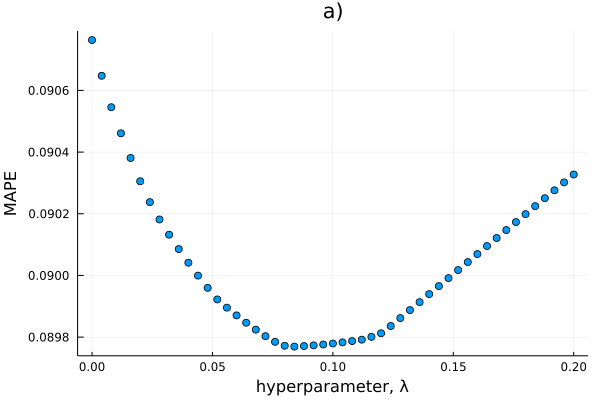

In [161]:
rep = report(mach);
plt = rep.plotting;
scatter(Float64.(plt.parameter_values), plt.measurements,
    label = :none)
xlabel!("hyperparameter, λ")
ylabel!("MAPE")
title!("a)")

### 3 Huber Regression Model
Huber regression is one robust regression, a type of regression model that is not sensitive to data outliers (Z. Wang et al., 2017). The "best" coefficient value for the Huber regression model is obtained by minimizing the average value of the Huber loss (Huber, 1964), given by

$${\hat{\beta}}_h=\arg{\min\limits_\beta{\frac{1}{N}\sum_{i=1}^{N}\ell\left(f_\beta\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)}}$$

where

$$\ell\left(r\right)=
\begin{cases}
\dfrac{1}{2}r^2,& r<\delta\\
\delta\left(|r|-\dfrac{1}{2}\delta\right),& r\ge\delta
\end{cases}$$

where ${\hat{\beta}}_h$ is the approximate value of the coefficient $\beta$ based on Huber regression. The function $\ell\left(r\right)$ is called a Huber loss or smooth absolute loss function, while $\delta$ is a hyperparameter of this model.

Huber regression, also called robust regression with Huber loss, is a regression type that is not sensitive to data outliers. Although not sensitive to outliers, Huber regression does not ignore the effect of data outliers. Huber regression only assigns a lower weight to the outlier. Huber regression will optimize the square loss when the absolute value of the residual between the actual and predicted values is less than a bound $\delta$, which is called the hyperparameter. Meanwhile, the absolute loss will be optimized if the residual value is greater than the hyperparameter value.

In contrast to least squares and ridge regression, the estimation of the Huber regression's coefficients cannot use a matrix formulation. One method used for Huber regression or other robust regression is M-estimation. The letter of M in M-estimation stands for "_maximum likelihood type_". Using MLJ packages, Huber regression coefficients can be estimated easily and quickly.

In [162]:
HuberRegressor = (@load HuberRegressor pkg=MLJLinearModels verbosity=0)(
    lambda=0.0, penalty=:none)

HuberRegressor(
    delta = 0.5,
    lambda = 0.0,
    gamma = 0.0,
    penalty = :none,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @743

In [163]:
r = range(HuberRegressor, :delta , lower=0, upper=1)

typename(MLJBase.NumericRange)(Float64, :delta, ... )

In [164]:
tunned_huber_model = TunedModel(model=HuberRegressor, 
    tuning=Grid(resolution = 51,shuffle = false),
    resampling=CV(nfolds = 10),
    ranges=[r, ], 
    measure=mape);

In [165]:
mach = machine(tunned_huber_model, X, y)
fit!(mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…} @116.
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\4yebN\src\machines.jl:342
┌ Info: Attempting to evaluate 51 models.
└ @ MLJTuning C:\Users\LENOVO\.julia\packages\MLJTuning\9sSuR\src\tuned_models.jl:564
Evaluating over 51 metamodels: 100%[=========================] Time: 0:00:03


Machine{DeterministicTunedModel{Grid,…},…} @116 trained 1 time; caches data
  args: 
    1:	Source @394 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @735 ⏎ `AbstractVector{Continuous}`


In [166]:
fitted_params(mach).best_model

HuberRegressor(
    delta = 0.5,
    lambda = 0.0,
    gamma = 0.0,
    penalty = :none,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @863

In [167]:
fitted_params(mach).best_fitted_params |> pprint

(coefs = [:X1 => 0.7273324063894198,
          :X2 => -6.174301144205878,
          :X3 => 9.444728271852547,
          :X4 => -4.371612196275405,
          :X5 => 4.2189163368192935,
          :X6 => -9.56433366925777],
 intercept = 68.00628376438438)

In [168]:
ŷ = predict(mach, rows=test);

In [169]:
rms(ŷ,y[test])

6.854664907243711

In [170]:
mape(ŷ,y[test])

0.06904317209456445

In [171]:
maximum(abs.(ŷ.-y[test]))

22.804814599973966

In [172]:
rep = report(mach);
plt = rep.plotting;
[Float64.(plt.parameter_values) plt.measurements]

51×2 Matrix{Float64}:
 0.0   1.0
 0.02  0.0785886
 0.04  0.0786008
 0.06  0.0785804
 0.08  0.0785524
 0.1   0.0785325
 0.12  0.0784908
 0.14  0.0784333
 0.16  0.0783814
 0.18  0.0783367
 0.2   0.0783131
 0.22  0.0783019
 0.24  0.0782902
 0.26  0.0782759
 0.28  0.0782587
 0.3   0.0782435
 0.32  0.0782311
 0.34  0.0782138
 0.36  0.078207
 0.38  0.0782034
 0.4   0.0782014
 0.42  0.0781967
 0.44  0.0781912
 0.46  0.0781894
 0.48  0.0781841
 0.5   0.0781829
 0.52  0.0781897
 0.54  0.0782018
 0.56  0.0782188
 0.58  0.0782287
 0.6   0.0782367
 0.62  0.078248
 0.64  0.0782618
 0.66  0.0782718
 0.68  0.0782804
 0.7   0.0782926
 0.72  0.078308
 0.74  0.0783286
 0.76  0.0783519
 0.78  0.078382
 0.8   0.0784159
 0.82  0.0784507
 0.84  0.0784929
 0.86  0.0785356
 0.88  0.0785783
 0.9   0.0786231
 0.92  0.0786703
 0.94  0.0787167
 0.96  0.0787635
 0.98  0.0788071
 1.0   0.0788504

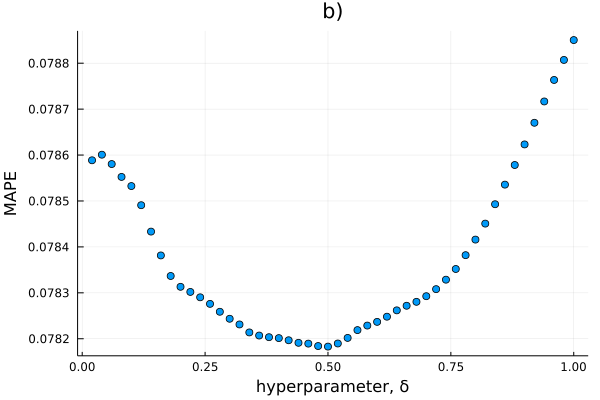

In [173]:
rep = report(mach);
plt = rep.plotting;
scatter(Float64.(plt.parameter_values)[2:end], plt.measurements[2:end],
    label = :none)
xlabel!("hyperparameter, δ")
ylabel!("MAPE")
title!("b)")

### 4 Quantile Regression
Quantile regression is an extension of the least-square regression used when least-square conditions or assumptions are not met (Koenker & Bassett, 1978). In contrast to least-square, which estimates the conditional mean, quantile regression estimates the conditional median or other quantile values of the response variable across values of the predictor variables (Davino et al., 2022). 

The "best" coefficient value for the quantile regression model is obtained by minimizing the average pinball loss ($P_\delta$) a.k.a. linear loss, given by

$$
{\hat{\beta}}_q=\arg{\min\limits_\beta{\frac{1}{N}\sum_{i=1}^{N}{P_\delta\left(f_\beta\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)}}}
$$

where

$$
P_\delta\left(r\right)=
\begin{cases}
\delta r,& r>0\\
(1-\delta)r,& r\le0
\end{cases}
$$

where ${\hat{\beta}}_q$ is the approximate value of the coefficient $\beta$ based on quantile regression. The value of $\delta$ is the hyperparameter of this model, referred to as the quantile. If $\delta$ is equal to 0.5, then quantile regression estimates the conditional median of $y$ across values of $x$. 


In [174]:
QuantileRegressor = (@load QuantileRegressor verbosity=0)(penalty =:none)

QuantileRegressor(
    delta = 0.5,
    lambda = 1.0,
    gamma = 0.0,
    penalty = :none,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @261

In [175]:
r = range(QuantileRegressor, :delta , lower=0, upper=1)

typename(MLJBase.NumericRange)(Float64, :delta, ... )

In [176]:
tunned_quantile_model = TunedModel(model=QuantileRegressor, 
    tuning=Grid(resolution = 51,shuffle = false),
    resampling=CV(nfolds = 10),
    ranges=[r, ], 
    measure=mape);

In [177]:
mach = machine(tunned_quantile_model, X, y)
fit!(mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…} @747.
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\4yebN\src\machines.jl:342
┌ Info: Attempting to evaluate 51 models.
└ @ MLJTuning C:\Users\LENOVO\.julia\packages\MLJTuning\9sSuR\src\tuned_models.jl:564
Evaluating over 51 metamodels: 100%[=========================] Time: 0:00:07


Machine{DeterministicTunedModel{Grid,…},…} @747 trained 1 time; caches data
  args: 
    1:	Source @137 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @280 ⏎ `AbstractVector{Continuous}`


In [178]:
fitted_params(mach).best_model

QuantileRegressor(
    delta = 0.58,
    lambda = 1.0,
    gamma = 0.0,
    penalty = :none,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @386

In [179]:
fitted_params(mach).best_fitted_params |> pprint

(coefs = [:X1 => -0.5523576718904972,
          :X2 => -5.133703409743876,
          :X3 => 8.238466220625098,
          :X4 => -1.9609670085329274,
          :X5 => 4.271738865653784,
          :X6 => -10.464053946184618],
 intercept = 67.13303402414503)

In [180]:
ŷ = predict(mach, rows=test);

In [181]:
rms(ŷ,y[test])

7.143998003325961

In [182]:
mape(ŷ,y[test])

0.07086787365681008

In [183]:
maximum(abs.(ŷ.-y[test]))

23.649153103489517

In [184]:
rep = report(mach);
plt = rep.plotting;
[Float64.(plt.parameter_values) plt.measurements]

51×2 Matrix{Float64}:
 0.0   182.604
 0.02    0.40743
 0.04    0.339865
 0.06    0.268159
 0.08    0.206979
 0.1     0.180569
 0.12    0.160137
 0.14    0.154677
 0.16    0.147721
 0.18    0.139701
 0.2     0.128844
 0.22    0.119649
 0.24    0.110921
 0.26    0.105233
 0.28    0.101926
 0.3     0.0978964
 0.32    0.0951288
 0.34    0.092697
 0.36    0.0903545
 0.38    0.0882409
 0.4     0.085495
 0.42    0.0835518
 0.44    0.0818036
 0.46    0.0810279
 0.48    0.0798298
 0.5     0.0783934
 0.52    0.0771902
 0.54    0.0770728
 0.56    0.0770534
 0.58    0.0766142
 0.6     0.0769565
 0.62    0.077379
 0.64    0.0780633
 0.66    0.0789437
 0.68    0.0798571
 0.7     0.0807002
 0.72    0.0810056
 0.74    0.0821736
 0.76    0.0837002
 0.78    0.0850566
 0.8     0.0868306
 0.82    0.0876972
 0.84    0.0901466
 0.86    0.0905072
 0.88    0.0949529
 0.9     0.1011
 0.92    0.104204
 0.94    0.109305
 0.96    0.116153
 0.98    0.13617
 1.0     1.0

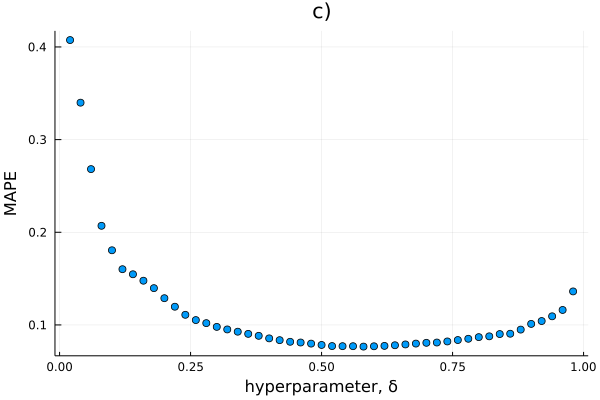

In [185]:
rep = report(mach);
plt = rep.plotting;
scatter(Float64.(plt.parameter_values)[2:end-1], plt.measurements[2:end-1],
    label = :none)
xlabel!("hyperparameter, δ")
ylabel!("MAPE")
title!("c)")

### 5 Quantile Regression Model with $l_2$-Regularization
The last regression model used is the quantile regression model with $l_2$-regularization. The "best" coefficient value for this regression model is obtained by minimizing the linear loss added with $l_2$-regularization, given by
$$
{\hat{\beta}}_{ql}=\arg{\min\limits_\beta{\frac{1}{N}\sum_{i=1}^{N}{P_\delta\left(f_\beta\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)}}}+\lambda\lVertβ\rVert_2^2
$$
where ${\hat{\beta}}_{ql}$ is the approximate value of the coefficient $\beta$ based on quantile regression with $l_2$-regularization. The value of $\delta$ used is the value obtained in the quantile regression in the previous model. Thus, the hyperparameter that needs to be tuned in this regression model is $\lambda$, which is the coefficient of $l_2$-regularization.


In [120]:
QuantileRegressor = (@load QuantileRegressor verbosity=0)(delta = 0.56, penalty =:l2)

QuantileRegressor(
    delta = 0.56,
    lambda = 1.0,
    gamma = 0.0,
    penalty = :l2,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @628

In [121]:
r = range(QuantileRegressor, :lambda , lower=0.5, upper=1)

typename(MLJBase.NumericRange)(Float64, :lambda, ... )

In [122]:
tunned_quantile_model = TunedModel(model=QuantileRegressor, 
    tuning=Grid(resolution = 51,shuffle = false),
    resampling=CV(nfolds = 10),
    ranges=[r, ], 
    measure=mape);

In [123]:
mach = machine(tunned_quantile_model, X, y)
fit!(mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…} @842.
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\4yebN\src\machines.jl:342
┌ Info: Attempting to evaluate 51 models.
└ @ MLJTuning C:\Users\LENOVO\.julia\packages\MLJTuning\9sSuR\src\tuned_models.jl:564
Evaluating over 51 metamodels: 100%[=========================] Time: 0:00:13


Machine{DeterministicTunedModel{Grid,…},…} @842 trained 1 time; caches data
  args: 
    1:	Source @111 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @735 ⏎ `AbstractVector{Continuous}`


In [124]:
fitted_params(mach).best_model

QuantileRegressor(
    delta = 0.56,
    lambda = 0.57,
    gamma = 0.0,
    penalty = :l2,
    fit_intercept = true,
    penalize_intercept = false,
    solver = nothing) @483

In [125]:
fitted_params(mach).best_fitted_params |> pprint

(coefs = [:X1 => 0.03924261666725351,
          :X2 => -0.5021557212176755,
          :X3 => 0.6165230047228178,
          :X4 => -0.9654198619992472,
          :X5 => -1.1003986493814037,
          :X6 => -2.4811755357729397],
 intercept = 63.38018059527416)

In [126]:
ŷ = predict(mach, rows=test);

In [127]:
rms(ŷ,y[test])

7.386219338931326

In [128]:
mape(ŷ,y[test])

0.07083650516212496

In [129]:
maximum(abs.(ŷ.-y[test]))

28.203661723698332

In [130]:
rep = report(mach);
plt = rep.plotting;
[Float64.(plt.parameter_values) plt.measurements]

51×2 Matrix{Float64}:
 0.5   0.0736358
 0.51  0.0736184
 0.52  0.0736101
 0.53  0.0735876
 0.54  0.0735797
 0.55  0.0735747
 0.56  0.0735659
 0.57  0.0735651
 0.58  0.0735662
 0.59  0.073569
 0.6   0.0735692
 0.61  0.0735706
 0.62  0.0735692
 0.63  0.0735722
 0.64  0.0735726
 0.65  0.0735792
 0.66  0.0735766
 0.67  0.0735766
 0.68  0.0735909
 0.69  0.0735782
 0.7   0.0735908
 0.71  0.0735933
 0.72  0.0735963
 0.73  0.0735971
 0.74  0.0735835
 0.75  0.0736014
 0.76  0.0736033
 0.77  0.0736096
 0.78  0.0736056
 0.79  0.0736182
 0.8   0.0736262
 0.81  0.0736331
 0.82  0.0736295
 0.83  0.0736331
 0.84  0.0736394
 0.85  0.0736315
 0.86  0.0736346
 0.87  0.0736278
 0.88  0.0736276
 0.89  0.0736348
 0.9   0.0736376
 0.91  0.0736382
 0.92  0.0736422
 0.93  0.0736407
 0.94  0.0736392
 0.95  0.0736443
 0.96  0.0736467
 0.97  0.0736459
 0.98  0.0736438
 0.99  0.073639
 1.0   0.0736482

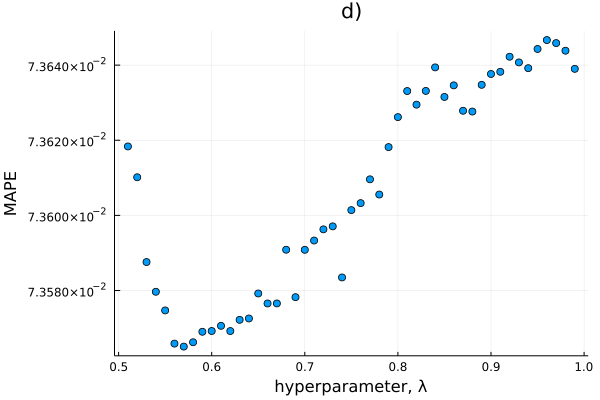

In [131]:
rep = report(mach);
plt = rep.plotting;
scatter(Float64.(plt.parameter_values)[2:end-1], plt.measurements[2:end-1],
    label = :none)
xlabel!("hyperparameter, λ")
ylabel!("MAPE")
title!("d)")

## Summary
Based on the training data, the least-square regression model is obtained and is given by

$$f_{{\hat{\beta}}_{ls}}\left(x\right)=66.47+1.84X_1-3.43X_2+5.03X_3+20.24X_4-20.76X_5-7.69X_6$$

Based on the training data and the hyperparameter value $\lambda=0.048$, the ridge regression model is given by

$$f_{{\hat{\beta}}_r}\left(x\right)=63.85+2.32X_1-2.97X_2+4.69X_3+17.14X_4-15.77X_5-9.45X_6$$

Based on the training data and the hyperparameter value $\delta=0.84$, the Huber regression model is given by

$$f_{{\hat{\beta}}_h}\left(x\right)=66.55+1.24X_1-4.36X_2+8.09X_3-1.75X_4-2.83X_5-5.64X_6$$

Based on the training data and the hyperparameter value $\delta=0.6$, the quantile regression model is given by

$$f_{{\hat{\beta}}_q}\left(x\right)=63.19+0.83X_1-2.85X_2+7.18X_3-3.31X_4-0.44X_5-5.85X_6$$

Based on the training data and the hyperparameter values $\delta=0.6$, and $\lambda=0.9$, the quantile regression model with $l_2$-regularization is obtained and is given by

$$f_{{\hat{\beta}}_{ql}}\left(x\right)=63.19+0.83X_1-2.85X_2+7.18X_3-3.31X_4-0.44X_5-5.85X_6$$


After the five models are obtained, the next step is to evaluate these models using data testing. There are three criteria used in this evaluation step, i.e., the maximum error value ($\varepsilon_{max}$), the root mean squared error (RMSE), and the mean absolute proportional error (MAPE). The evaluation results of the five models can be seen in Table 1 below.

|Regression models| hyperpar. $\lambda$ | hyperpar. $\delta$  | $\varepsilon_{max}$ |RMSE|MAPE|
|:-|:-:|:-:|-|-|-|
|Least square|-|-|9.2712|3.9055|7.17%|
|Ridge|0.048|-|9.1667|3.7814|6.95%|
|Huber|-|0.84|5.4043|2.4019|3.90%|
|Quantile|-|0.60|5.2159|**2.3094**|**3.56%**|
|Quantile with $l_2$|0.90|0.60|**4.8959**|2.3673|4.03%|

This is the prediction results of the study period using quantile regression with $l_2$-regularization on data testing 

In [ ]:
fitted_params(mach).best_model

In [ ]:
Evals = X[test,:]
Evals.Y = y[test]
Evals.Yhat = predict(mach, rows=test)
Evals.Error = Evals.Yhat-Evals.Y
Evals.AbsError = abs.(Evals.Yhat-Evals.Y)
sort(Evals,:AbsError,rev=true)

# 🍁 Thank You 🍁